# Homework #1 Codes
**Stu. name:** Seyed Mohammad Amin Dadgar <br>
**Stu. id:** 4003624016

## Question 2 of the second chapter of Zimmermann, 4th ed, 2001 book

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def find_alpha_cuts(A_tilda, **kwargs):
    """
    Find all the alpha-cuts of a fuzzy set
    
    Parameters:
    ------------
    A_tilda : array of tuples
        The fuzzy set that we are trying to find its alpha cuts
    kwargs -> interval : Floating number between `0` and `1`
        the alpha-cuts computed from intervals, example `0.25` have five alpha-cuts `0`, `0.25`, `0.5`, `0.75`, `1`
        Note: `0` and `1` are excluded!
        default is `-1`
    kwargs -> alpha_cuts : array_like
        if alpha_cuts are sent as input, the intervals variable would be omited
        An array of floating points between `0` and `1`, default is None
    
    **Important**: one of interval or alpha_cuts should be sent as input, otherwise an error would be raised!
        
    Returns:
    --------
    alpha_cuts : dictionary
        a python dictionary with key of alpha-cuts and values
    strong_alpha_cuts : dictionary
        a python dictionary with key of alpha-cuts and values
    """
    ## create dictionaries to save later
    alpha_cuts = {}
    alpha_cuts_strong = {}
    
    ## intialize the variable
    alpha_cuts_interval = []
        
    if 'interval' in kwargs:
        alpha_cuts_interval = np.arange(0, 1, kwargs['interval'])
    elif 'alpha_cuts' in kwargs:
        alpha_cuts_interval = kwargs['alpha_cuts']
    else:
        raise "Error: One of the interval or alpha_cuts variable must have a value! (Not both either)" 
        
    ## for each alpha-cut
    ## step is alpha-cut in each iteration
    for step in alpha_cuts_interval:
        ## choose the values of the alpha-cut
        values = A_tilda[A_tilda[:, 1] >= step]
        
        ## choose the values of strong alpha-cuts
        strong_values = A_tilda[A_tilda[:, 1] > step]
    
        ## save the alpha-cut set with the key of alpha-cut value
        alpha_cuts[step] = values
        alpha_cuts_strong[step] = strong_values
        
    ## the loop does not find the alpha-cut = 1
    ## alpha-cut = 1 is actually the whole set!
    alpha_cuts[1.0] = A_tilda
        
    return alpha_cuts, alpha_cuts_strong

In [3]:
def plot_scatter_alpha_cuts(alpha_cut_set):
    """
    Plot the level sets of alpha cuts, using scatter plot
    
    Parameters:
    ----------
    alpha_cut_set : fictionary
        a dictionary of alpha_cuts related to a fuzzy set
        
    """
    
    keys = alpha_cut_set.keys()
    ## initialize an array to plot the data
    plot_data = []
    
    ## create the (x,y) array to plot the data
    for step in keys:
        ## find the values with membeship value equal to step
        value = alpha_cut_set[step]
        value = value[:, 0]
        ## get the values count for each alpha levels
        values_count = len(value)
        
        ## create an array of x_values and their alpha set
        alpha_level = np.full(values_count, step)
        data = np.stack((value, alpha_level), axis=1)
        ## the y value is actually the alphas
        plot_data.append(data)
    
    ## convert to a numpy array
    plot_data = np.array(plot_data, dtype=object)
    
    ## create a y array to save the y_ticks
    y_ticks = []
    x_ticks = []
    for data in plot_data:
        X = data[:, 0]
        Y = data[:, 1]
        
        y_ticks = np.append(y_ticks, Y)
        x_ticks = np.append(x_ticks, X)
        plt.scatter(X, Y)
    
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.show()

### Part (a)

In [15]:
A = np.array([[3, 1], [4, 0.2], [5, 0.3], [6, 0.4], 
                  [7, 0.6], [8, 0.8], [10, 1], [12, 0.8], [14, 0.6] ])
A_alpha_cuts_set, A_strong_alpha_cuts_set = find_alpha_cuts(A, interval=0.25)

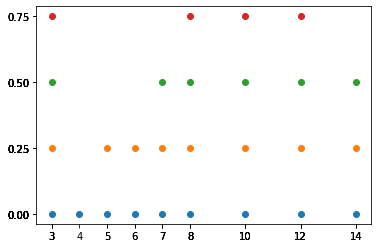

In [16]:
plot_scatter_alpha_cuts(A_strong_alpha_cuts_set)

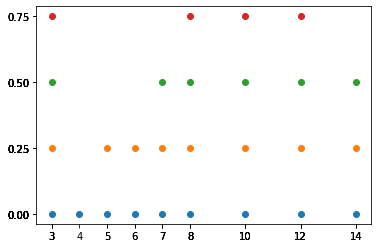

In [17]:
plot_scatter_alpha_cuts(A_strong_alpha_cuts_set)

Because our values for $\tilde{A}$ was discrete we plotted scatter plot for it.

### Part (b)
\begin{equation}
\tilde{B} = {(x, \mu_{\tilde{B}}(x) = (1+(x-10)^2)^{-1})}
\end{equation}

In [30]:
def mu_B(x):
    """
    calculating the membership function for \tilde{B}
    
    Parameters:
    -----------
    x : array_like
        array of numerics
    
    Returns:
    --------
    memebership_value : array_like
        the membership function for fuzzy values
    """
    
    memebership_value = 1 + 1 / np.power(x - 10, 2)
    
    return memebership_value

In [31]:
x = np.arange(1, 15)
## create the fuzzy set
B = np.stack((x, mu_B(x)), axis=1)
B

<ipython-input-30-61e8455105e8>:16: RuntimeWarning: divide by zero encountered in true_divide
  memebership_value = 1 + 1 / np.power(x - 10, 2)


array([[ 1.        ,  1.01234568],
       [ 2.        ,  1.015625  ],
       [ 3.        ,  1.02040816],
       [ 4.        ,  1.02777778],
       [ 5.        ,  1.04      ],
       [ 6.        ,  1.0625    ],
       [ 7.        ,  1.11111111],
       [ 8.        ,  1.25      ],
       [ 9.        ,  2.        ],
       [10.        ,         inf],
       [11.        ,  2.        ],
       [12.        ,  1.25      ],
       [13.        ,  1.11111111],
       [14.        ,  1.0625    ]])

In [33]:
B_alpha_cuts_set, B_strong_alpha_cuts_set = find_alpha_cuts(B, alpha_cuts=[0.3, 0.5, 0.8])

In [32]:
# B_alpha_cuts_set